<div class="alert alert-block alert-info">
    <h1>Autonomous Mobile Robots</h1>
    <h2> AMR_WS23_Assignment02 </h2>
    <h3>General Information:</h3>
    <p>Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.<br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>).</p>
    <p>Code cells where you are supposed to give your answer often include the line  ```raise NotImplementedError```. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.</p>
    <h3>Submission:</h3>
    <p>Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignment is due on <b>29-10-2023</b> at <b>18:00 (6 PM)<b>.</p>
    <h3>Questions about the Assignment:</h3>
    <p>Proactive discussions lead to better understanding. If you have questions about the assignment you are highly encourageed to post them in the LEA forum. Let's keep the forum active.</p>
    
</div>

# Multi-sensor Data Visualisation, Analysis, and Filtering

In this assignment, you will visualise the data from different sensors installed on Robile which include 2D and 3D LiDARs, IMU, and RGB-D camera. For getting accustomed to visualisation tools, you will also detect some anomalies added to the LiDAR and RGB-D sensors. You will detect the approximate time or range of time at which these anomalies are introduced.

Further, you will apply different filtering methods such as mean, median, and  reduction filtering over 2D LiDAR data and IMU data.

Please download the bag file from the cloud storage. The link and the password are as follows,  
**Bag file (3.1GB):** https://nx21454.your-storageshare.de/s/w8C6gpHFLgHy9z3  
**Password:** `*/R&dD*O*3`  


Let us first import all necessary packages. Please ignore the 'YOUR CODE HERE' prompt in the below cell.

In [1]:
import rclpy
import rosbag2_py
from rosbag2_py import StorageOptions, ConverterOptions, SequentialReader
from rclpy.serialization import deserialize_message

from sensor_msgs.msg import LaserScan
from sensor_msgs.msg import PointCloud2
from sensor_msgs.msg import Image
from tf2_msgs.msg import TFMessage

import tf2_ros
import tf_transformations
from geometry_msgs.msg import Quaternion

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE
# raise NotImplementedError()


## LiDAR visualisation

An anomaly is introduced by covering the LiDAR sensor by an opaque object, because of which we loose the laser scan data for approximately 2 seconds. Using `foxglove` visualisation tool, find the approximate time period in which the 2D LiDAR was covered. Plotjuggler will not allow to get all indices of the scan data in a single selection, so it is more suitable to visualise single variable which is a function of time (eg: imu data).

After visualising the data, please take a screenshot of it and upload the screenshot to the `img` folder. Further, embed it to the below markdown cell using this syntax in new line: `![file_name.png](attachment:file_name.png)`, where `file_name` is the image file name.

**Useful links:**

* [Foxglove weblink](https://studio.foxglove.dev/)
* [Foxglove download instructions](https://foxglove.dev/download)
* [Plot Juggler download instructions and tutorials](https://github.com/facontidavide/PlotJuggler)

In `foxglove` you can directly upload the `.db3` file and use the different panel options to visualise the data.
In plotjuggler, you can upload the `.yaml` file located in the folder of the `.db3` bag file and select the topics to be visualised in the prompt, which is displayed after selecting yaml file. Later the corresponding fields can be dragged and dropped to visualise them. 

**Note:** Due to the size of the data, it might not be possible to visualize all the data together in `foxglove` based on your system configuration. In that case, please only visualise necessary data according to the tasks. It is recommended to download the tool instead of using the web application for better handling of a large amount of data.

YOUR ANSWER HERE


the time period is 5:19:16.934 to 5:19:19.173 (The laser was covered with Opaque object

![Opaque_Object.png](AMR_WS23_Assignment02_worksheet_files/img/opaque_object.png)


## 3D LiDAR from robosense and depth data from realsense sensor visualisation

At any time instance, take the screenshot of the 3D LiDAR data from the robosense data using any of the above visualisation tools and embed the picture in the below cell.

YOUR ANSWER HERE


![3D_Lidar.png](AMR_WS23_Assignment02_worksheet_files/img/3D_Lidar.png)


## RGB image visualisation

Extract the image from the realsense camera and plot it from a frame which is closest to the input time.

**Hint:** You might take a look at different options under panel tab in `foxglove` tool

YOUR ANSWER HERE

![RGB_Image.png](AMR_WS23_Assignment02_worksheet_files/img/RGB_Image.png)


## IMU data visualisation

To record the scenario of impact on the robot, it is 'kicked' after it comes to halt. Using the IMU readings (acceleration), find the time instance at which the robot detects this impact. However the spikes in the IMU data are also caused by start of motion of the robot. So, you have to label the spikes accordingly from the data that you visualise.

You can either use `foxglove` or `plojuggler` visualisation tool to plot the IMU acceleraion readings. 
However, by using `foxglove`, it is helpful to simultaniously look at the robot moving and the corresponding IMU readings. 
Below is example of how the visualisation would look,

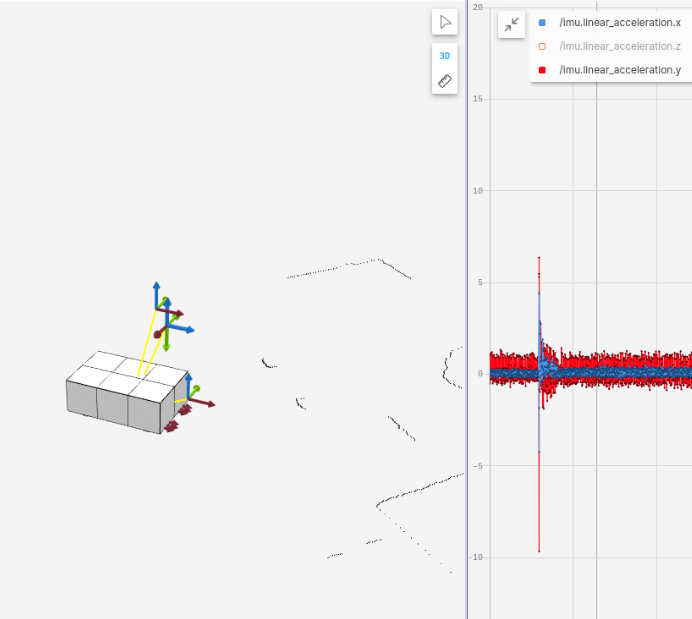

YOUR ANSWER HERE

![plot_juggler_kicked.png](AMR_WS23_Assignment02_worksheet_files/img/plot_juggler_kicked.png)
![IMU_data_kicked.png](AMR_WS23_Assignment02_worksheet_files/img/IMU_data_kicked.png)



## Filtering

Generally sensor readings consists of outliers and noise in the measurements. You will implement two filtering techniques of median and mean filters on the 2D LiDAR data and the IMU data. Before looking into filters, we will extract necessary data from the bag files.

You can plot the graphs on your local machine and provide your code in this notebook.

### Extraction of data from bag files

Similar to the first assignment, extract both 2D LiDAR data and IMU acceleration data from the bag file. Parameterise your function with the time closest to which you want to fetch the instance of data.


closing.

closing.


[INFO] [1698264795.918447634] [rosbag2_storage]: Opened database '/home/ibhu/amr_assignmnet/AMR_WS2023/assign2/robile_bag_file/robile_bag_file.db3' for READ_ONLY.


ValueError: x and y must have same first dimension, but have shapes (362,) and (513,)

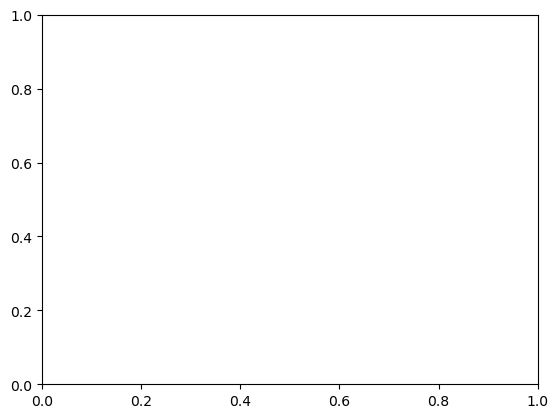

In [5]:
bag_file_path = '/home/ibhu/amr_assignmnet/AMR_WS2023/assign2/robile_bag_file/robile_bag_file.db3'
scan_topic_name = '/scan'


# Configure storage and converter options.
storage_options = StorageOptions(uri=bag_file_path,storage_id="sqlite3")
converter_options = ConverterOptions(input_serialization_format="cdr", output_serialization_format="cdr")
# Initialize SequentialReader.

reader = SequentialReader()
reader.open(storage_options, converter_options)

# Find and store the first set of scan data.

scan_data = []
timestamps = []

while reader.has_next():
        topic, data, timestamp = reader.read_next()

        if topic.endswith("/scan"):  # Adjust the topic name as needed
            msg = deserialize_message(data, LaserScan)  # Use the appropriate message type

            # Assuming the scan data is in a list called "ranges"
            scan_data.extend(msg.ranges)
            timestamps.extend([timestamp] * len(msg.ranges))


        # print(scan_data)

# raise NotImplementedError()

# plt.figure()
# plt.plot(timestamps, scan_data, label='Scan Data')
# plt.xlabel('Timestamp')
# plt.ylabel('Scan Value')
# plt.title('Scan Data Plot')
# plt.legend()
# plt.show()




### 1.1 Median filter (on 2D LiDAR data)
In median filter, based on the sliding window of specific length, the central point in the window is replaced by the median of the points in the same window. This is helpful to remove any outliers in the sensor data. Apply median filter on both 2D LiDAR data and acceleration in `Y-axis` of IMU sensor readings.

For a given time from the start of simulation, plot `y` vs `x` coordinates for 2D LiDAR data before and after applying the filter.

Please refer to this [wiki page](https://en.wikipedia.org/wiki/Median_filter) for example of filtering 1D data.


**Note:** Please remember to include title, grids, labels, and legends while plotting.


In [ ]:
# YOUR CODE HERE
# raise NotImplementedError()


### 1.2 Median filter (on IMU data)

Similarly, plot the `acceleration in y-direction` vs `time` graph before and after filtering for IMU data.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()



### 2.1 Mean filter (on 2D LiDAR data)

Similar to median filter, the point under consideration is replaced by the mean of all points in the same window. This is generally used to smoothen the noise in the LiDAR data.

For a given time from the start of simulation, plot `y` vs `x` coordinates for 2D LiDAR data before and after applying the filter.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


### 2.2 Mean filter (on 2D LiDAR data)

Similarly, plot the `acceleration in y-direction` vs `time` graph before and after filtering for IMU data.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()